## Quiz: AI and Big Data
**Nama**: Janiar Rahma Putri

**NIM**: 101012300091

**Kelas**: TT-47-04

## Import Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data: Tipe Data
Representasikan tipe data yang ada dalam data tsb

In [ ]:
# Load the dataset using pd.read_csv
data = pd.read_csv('/content/epl-goalScorer(20-21).csv')

# Preview the dataset
print(data.head())
print(data.info())

   Unnamed: 0    id      player_name  games  time  goals         xG  assists  \
0           0   647       Harry Kane     35  3097     23  22.174859       14   
1           1  1250    Mohamed Salah     37  3085     22  20.250847        5   
2           2  1228  Bruno Fernandes     37  3117     18  16.019454       12   
3           3   453    Son Heung-Min     37  3139     17  11.023287       10   
4           4   822  Patrick Bamford     38  3085     17  18.401863        7   

          xA  shots  key_passes  yellow_cards  red_cards position  \
0   7.577094    138          49             1          0        F   
1   6.528526    126          55             0          0    F M S   
2  11.474996    121          95             6          0      M S   
3   9.512992     68          75             0          0    F M S   
4   3.782247    107          30             3          0      F S   

          team_title  npg       npxG    xGChain  xGBuildup  
0          Tottenham   19  19.130183  24.99

In [ ]:
data.describe()

,Unnamed: 0,id,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,260.500000,4380.932950,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,1.668582,1.821450,5.663368,3.455060
std,150.832689,3281.776121,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,2.909929,2.931176,5.600249,3.376584
min,0.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.250000,839.750000,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,0.000000,0.074668,1.191391,0.720353
50%,260.500000,4627.000000,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,0.500000,0.715585,4.252738,2.656397
75%,390.750000,7690.500000,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,2.000000,1.945799,8.308002,5.254647
max,521.000000,9552.000000,38.000000,3420.000000,23.000000,22.174859,14.000000,11.474996,138.000000,95.000000,12.000000,2.000000,19.000000,19.130183,28.968234,18.323006


In [31]:
data.head()

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796


## Nilai Statistik
Hitunglah nilai statistik dari data tsb

In [34]:
stats_summary = data.describe()
stats_summary

,Unnamed: 0,id,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,260.500000,4380.932950,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,1.668582,1.821450,5.663368,3.455060
std,150.832689,3281.776121,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,2.909929,2.931176,5.600249,3.376584
min,0.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.250000,839.750000,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,0.000000,0.074668,1.191391,0.720353
50%,260.500000,4627.000000,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,0.500000,0.715585,4.252738,2.656397
75%,390.750000,7690.500000,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,2.000000,1.945799,8.308002,5.254647
max,521.000000,9552.000000,38.000000,3420.000000,23.000000,22.174859,14.000000,11.474996,138.000000,95.000000,12.000000,2.000000,19.000000,19.130183,28.968234,18.323006


## Pencilan
Carilah nama pemain dengan jumlah assist yang termasuk pencilan menggunakan tukey's fences

In [37]:
# Menghitung pencilan dengan Tukey's Fences pada kolom 'assists'
Q1 = data["assists"].quantile(0.25)
Q3 = data["assists"].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Menemukan pemain dengan assist di luar batas pencilan
outliers = data[(data["assists"] < lower_fence) | (data["assists"] > upper_fence)][["player_name", "assists"]]
outliers


,player_name,assists
0,Harry Kane,14
2,Bruno Fernandes,12
3,Son Heung-Min,10
4,Patrick Bamford,7
6,Jamie Vardy,9
15,Marcus Rashford,9
16,Sadio Mané,7
18,Matheus Pereira,6
22,Raheem Sterling,6
26,Roberto Firmino,7


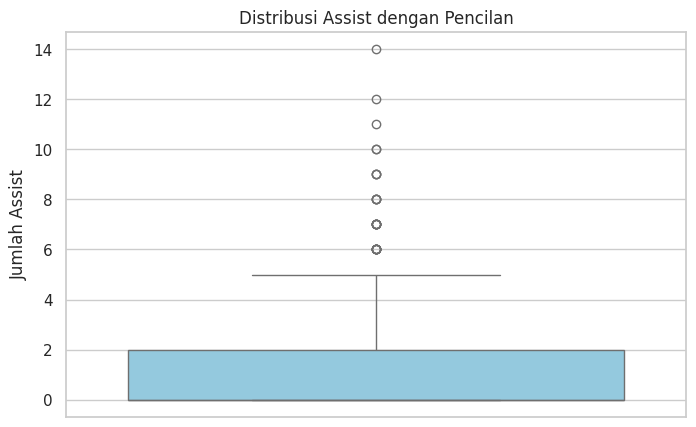

In [78]:
# Set style untuk seaborn
sns.set(style="whitegrid")

# 1. Boxplot jumlah assist untuk melihat pencilan
plt.figure(figsize=(8, 5))
sns.boxplot(y=data["assists"], color="skyblue")
plt.title("Distribusi Assist dengan Pencilan")
plt.ylabel("Jumlah Assist")
plt.show()

## Rata-rata dan Standar Deviasi
Lakukan analisis tekait rata-rata sampingan baku gol pertim (groupby)

In [38]:
# Menghitung rata-rata dan standar deviasi gol per tim
team_goal_stats = data.groupby("team_title")["goals"].agg(["mean", "std"]).reset_index()
team_goal_stats

,team_title,mean,std
0,Arsenal,1.961538,3.352381
1,"Arsenal,Brighton",0.000000,NaN
2,"Arsenal,Newcastle United",8.000000,NaN
3,"Arsenal,West Bromwich Albion",0.000000,NaN
4,Aston Villa,2.130435,3.696489
5,"Aston Villa,Chelsea",3.000000,NaN
6,Brighton,1.500000,2.158703
7,Burnley,1.280000,2.475210
8,Chelsea,2.240000,2.350177
9,"Chelsea,Fulham",1.000000,NaN


<ipython-input-49-199972d55fad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_goal_stats["team_title"], y=team_goal_stats["mean"], palette="viridis")


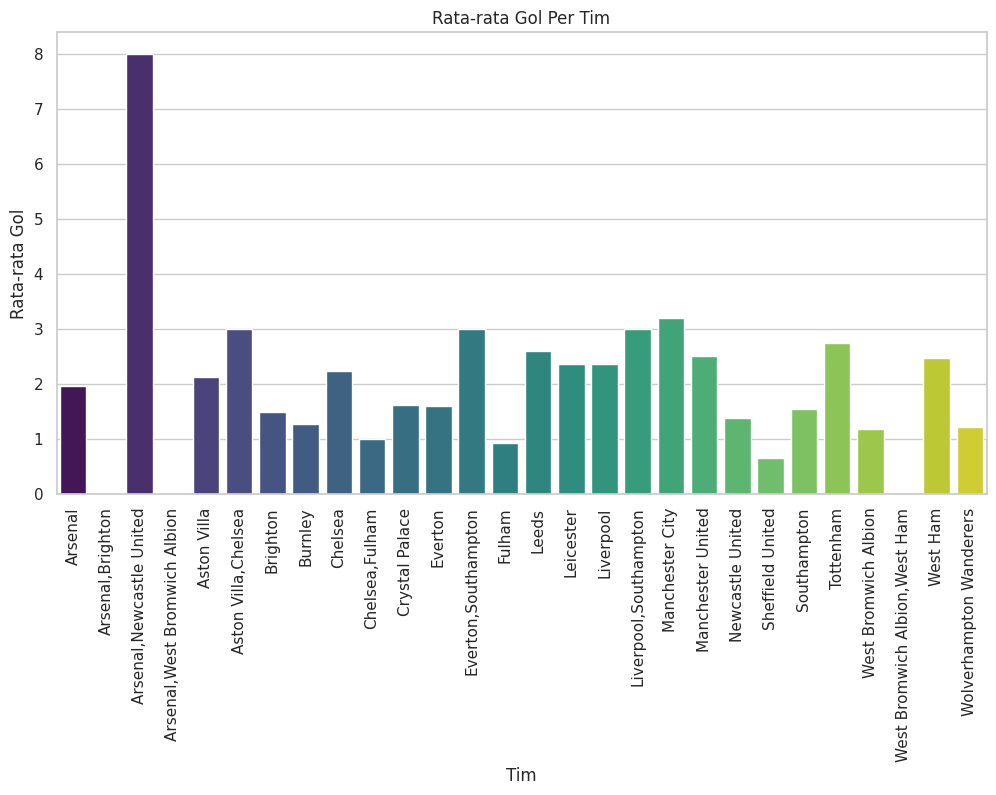

In [49]:
# Percobaan Bar Chart Rata-rata Gol Per Tim
plt.figure(figsize=(12, 6))
sns.barplot(x=team_goal_stats["team_title"], y=team_goal_stats["mean"], palette="viridis")
plt.xticks(rotation=90)
plt.title("Rata-rata Gol Per Tim")
plt.xlabel("Tim")
plt.ylabel("Rata-rata Gol")
plt.show()

## Korelasi
Carilah 5 fitur yang paling pengaruh dalam suatu pertandingan bola dari data tsb (korelasi)

In [45]:
# Memilih hanya kolom numerik untuk perhitungan korelasi
numeric_data = data.select_dtypes(include=["number"])

# Menghitung korelasi antara fitur numerik dengan jumlah gol
correlation_matrix = numeric_data.corr()
goal_correlation = correlation_matrix["goals"].abs().sort_values(ascending=False)

# Menampilkan 5 fitur dengan korelasi tertinggi terhadap jumlah gol (selain 'goals' sendiri)
top_5_features = goal_correlation.drop("goals").head(5)
top_5_features

,goals
npg,0.971591
xG,0.932798
npxG,0.905710
shots,0.873363
xGChain,0.727953


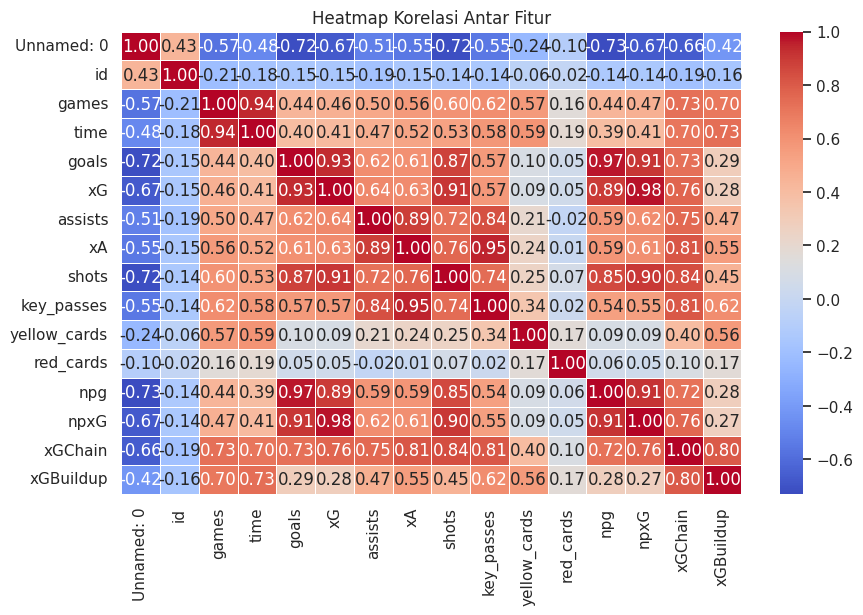

In [50]:
# Heatmap Korelasi Fitur terhadap Jumlah Gol
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

## Percobaan Regresi Linear menggunakan Scatter Plot

In [76]:
X = data[top_5_features.index]  # Features
y = data['goals']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

Mean Squared Error: 0.055418717502289154
R-squared: 0.996792527899298
Coefficients: [ 1.00456346  1.05114954 -1.05680917  0.00260731 -0.00646834]
Intercept: -0.007458634298431521


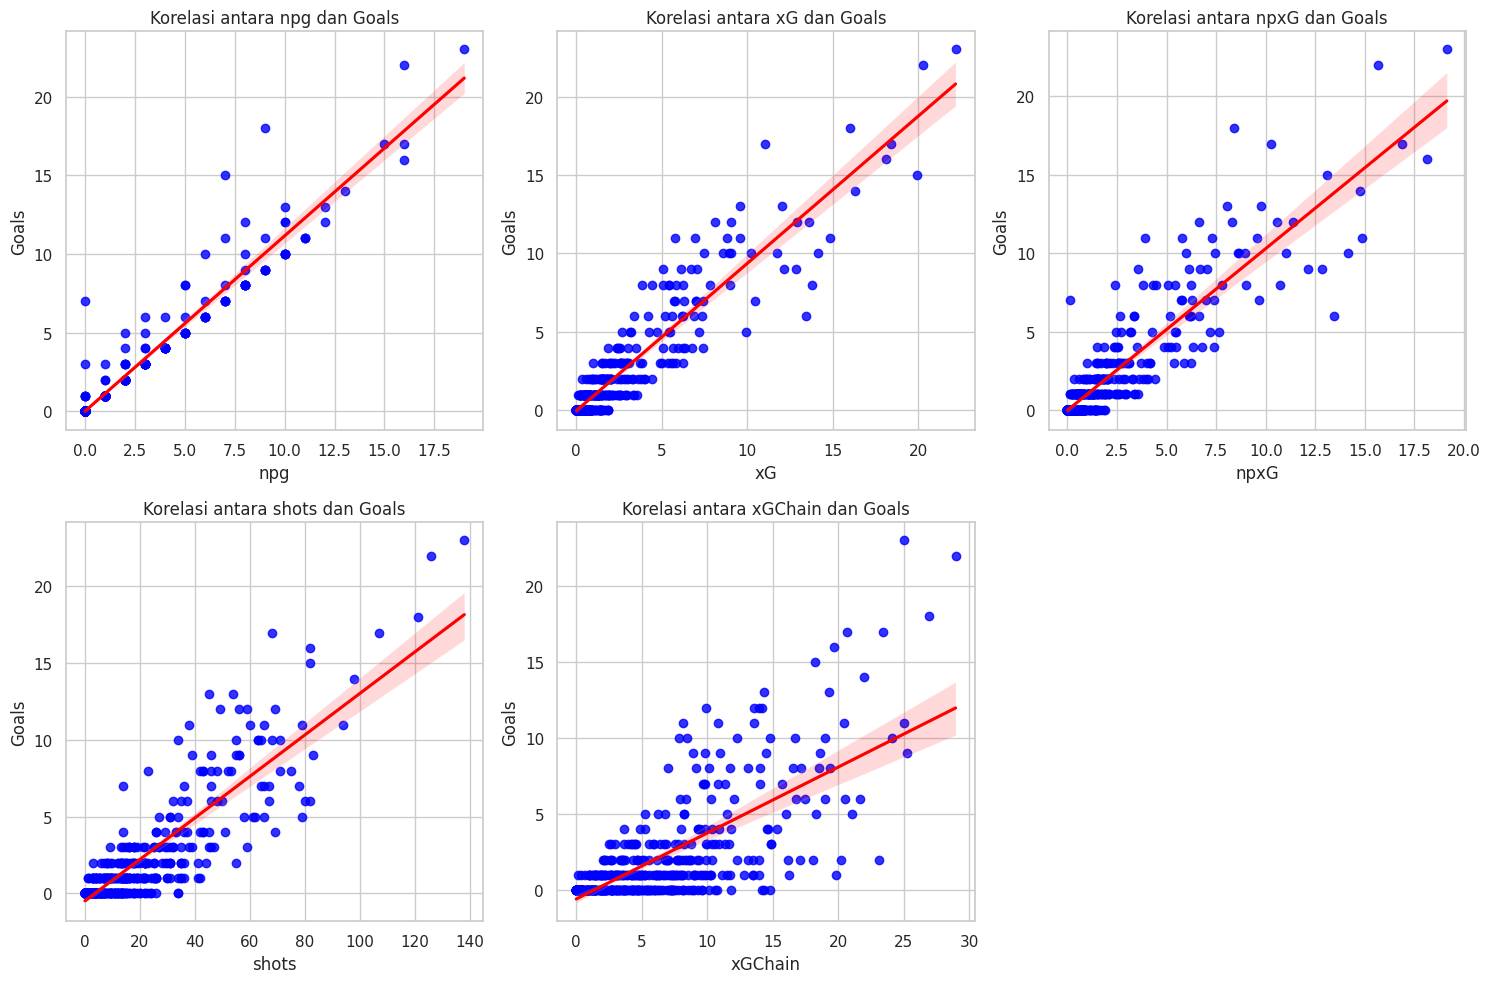

In [62]:
# Membuat scatter plot dengan garis regresi untuk 5 fitur dengan korelasi tertinggi terhadap gol
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_5_features.index, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=data[feature], y=data["goals"], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(f"Korelasi antara {feature} dan Goals")
    plt.xlabel(feature)
    plt.ylabel("Goals")

plt.tight_layout()
plt.show()
